Outlier Channel Splitting is not a commonly named technique, but it can be interpreted as separating or
identifying outliers within a dataset and analyzing them separately. This approach can help to understand if the
outliers significantly affect your analysis.

Below is an example in Python using `pandas` and `numpy`, where we generate some sample data with potential
outliers. We will then identify and separate these outliers for further inspection:

Original Data:
   feature1  feature2
0  0.496714 -1.415371
1 -0.138264 -0.420645
2  0.647689 -0.342715
3  1.523030 -0.802277
4 -0.234153 -0.161286

Outlier Data:
     feature1   feature2
95   8.536485  15.385317
96  10.296120  14.116143
97  10.261055  15.153725
98  10.005113  15.058209
99   9.765413  13.857030

Normal Data:
   feature1  feature2
0  0.496714 -1.415371
1 -0.138264 -0.420645
2  0.647689 -0.342715
3  1.523030 -0.802277
4 -0.234153 -0.161286


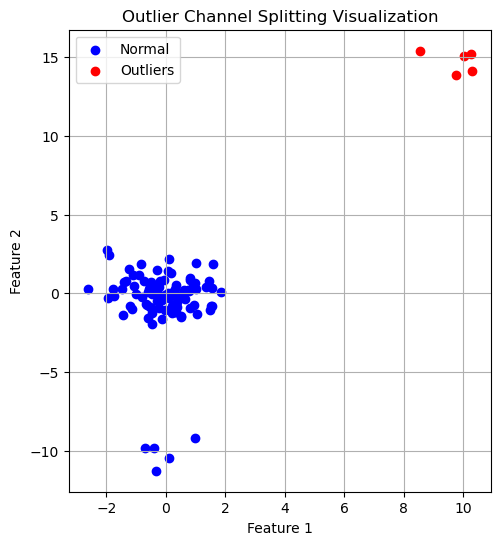

In [1]:
import pandas as pd
import numpy as np

# Generate sample data
np.random.seed(42)
data = {
    'feature1': np.concatenate([np.random.normal(loc=0, scale=1, size=95),
                                np.random.normal(loc=10, scale=1, size=5)]),
    'feature2': np.concatenate([np.random.normal(loc=0, scale=1, size=90),
                                np.random.normal(loc=-10, scale=1, size=5),
                                np.random.normal(loc=15, scale=1, size=5)])
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print("Original Data:")
print(df.head())

# Identify outliers using Z-score method (threshold: 3)
from scipy.stats import zscore

z_scores = np.abs(zscore(df))
outliers = (z_scores > 3).any(axis=1)

# Separate outliers from normal data
outlier_data = df[outliers]
normal_data = df[~outliers]

# Display the separated outlier and normal datasets
print("\nOutlier Data:")
print(outlier_data)

print("\nNormal Data:")
print(normal_data.head())

# Optional: Plotting to visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(normal_data['feature1'], normal_data['feature2'], color='blue', label='Normal')
plt.scatter(outlier_data['feature1'], outlier_data['feature2'], color='red', label='Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outlier Channel Splitting Visualization')
plt.legend()
plt.grid(True)
plt.show()


### Explanation:

- **Data Generation**: We create synthetic data with two features. For each feature, we add a small number of
outliers by drawing samples from different distributions.
- **Z-score Method**: We use the Z-score to identify outliers in the dataset. A common threshold is 3 standard
deviations away from the mean; any data point exceeding this is considered an outlier.
- **Separation**: We separate the identified outliers into one DataFrame and normal data points into another.
- **Visualization**: We plot both datasets to visualize the separation, where outliers are typically far from the
main cluster of data.

This example demonstrates how you might handle outlier detection and splitting in a dataset, allowing for targeted
analysis or handling strategies.